In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

In [66]:
celldata = pd.read_csv('celldata.csv')

# calculate mean of each column in data frame
meanList = []
for col in celldata.columns:
    meanList.append(celldata[col].mean())

# normalize by dividing every value in each column by the column's mean
for i in range(0,len(celldata.columns)):
    celldata.iloc[:,i] = celldata.iloc[:,i].div(meanList[i])

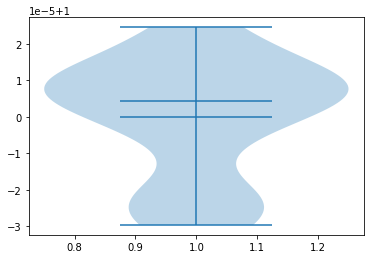

In [67]:
plt.violinplot([celldata.CELL1], showmeans=True, showmedians=True);

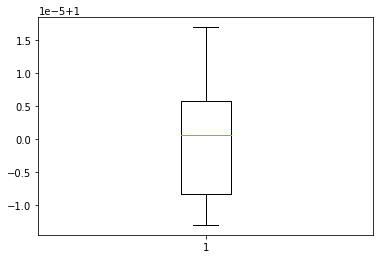

In [68]:
plt.boxplot([celldata.CELL2]);

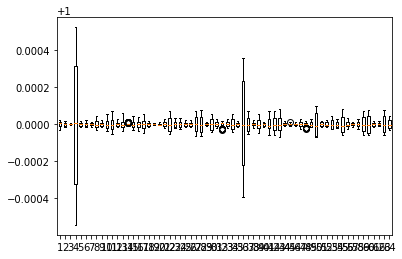

In [69]:
plt.boxplot(celldata);

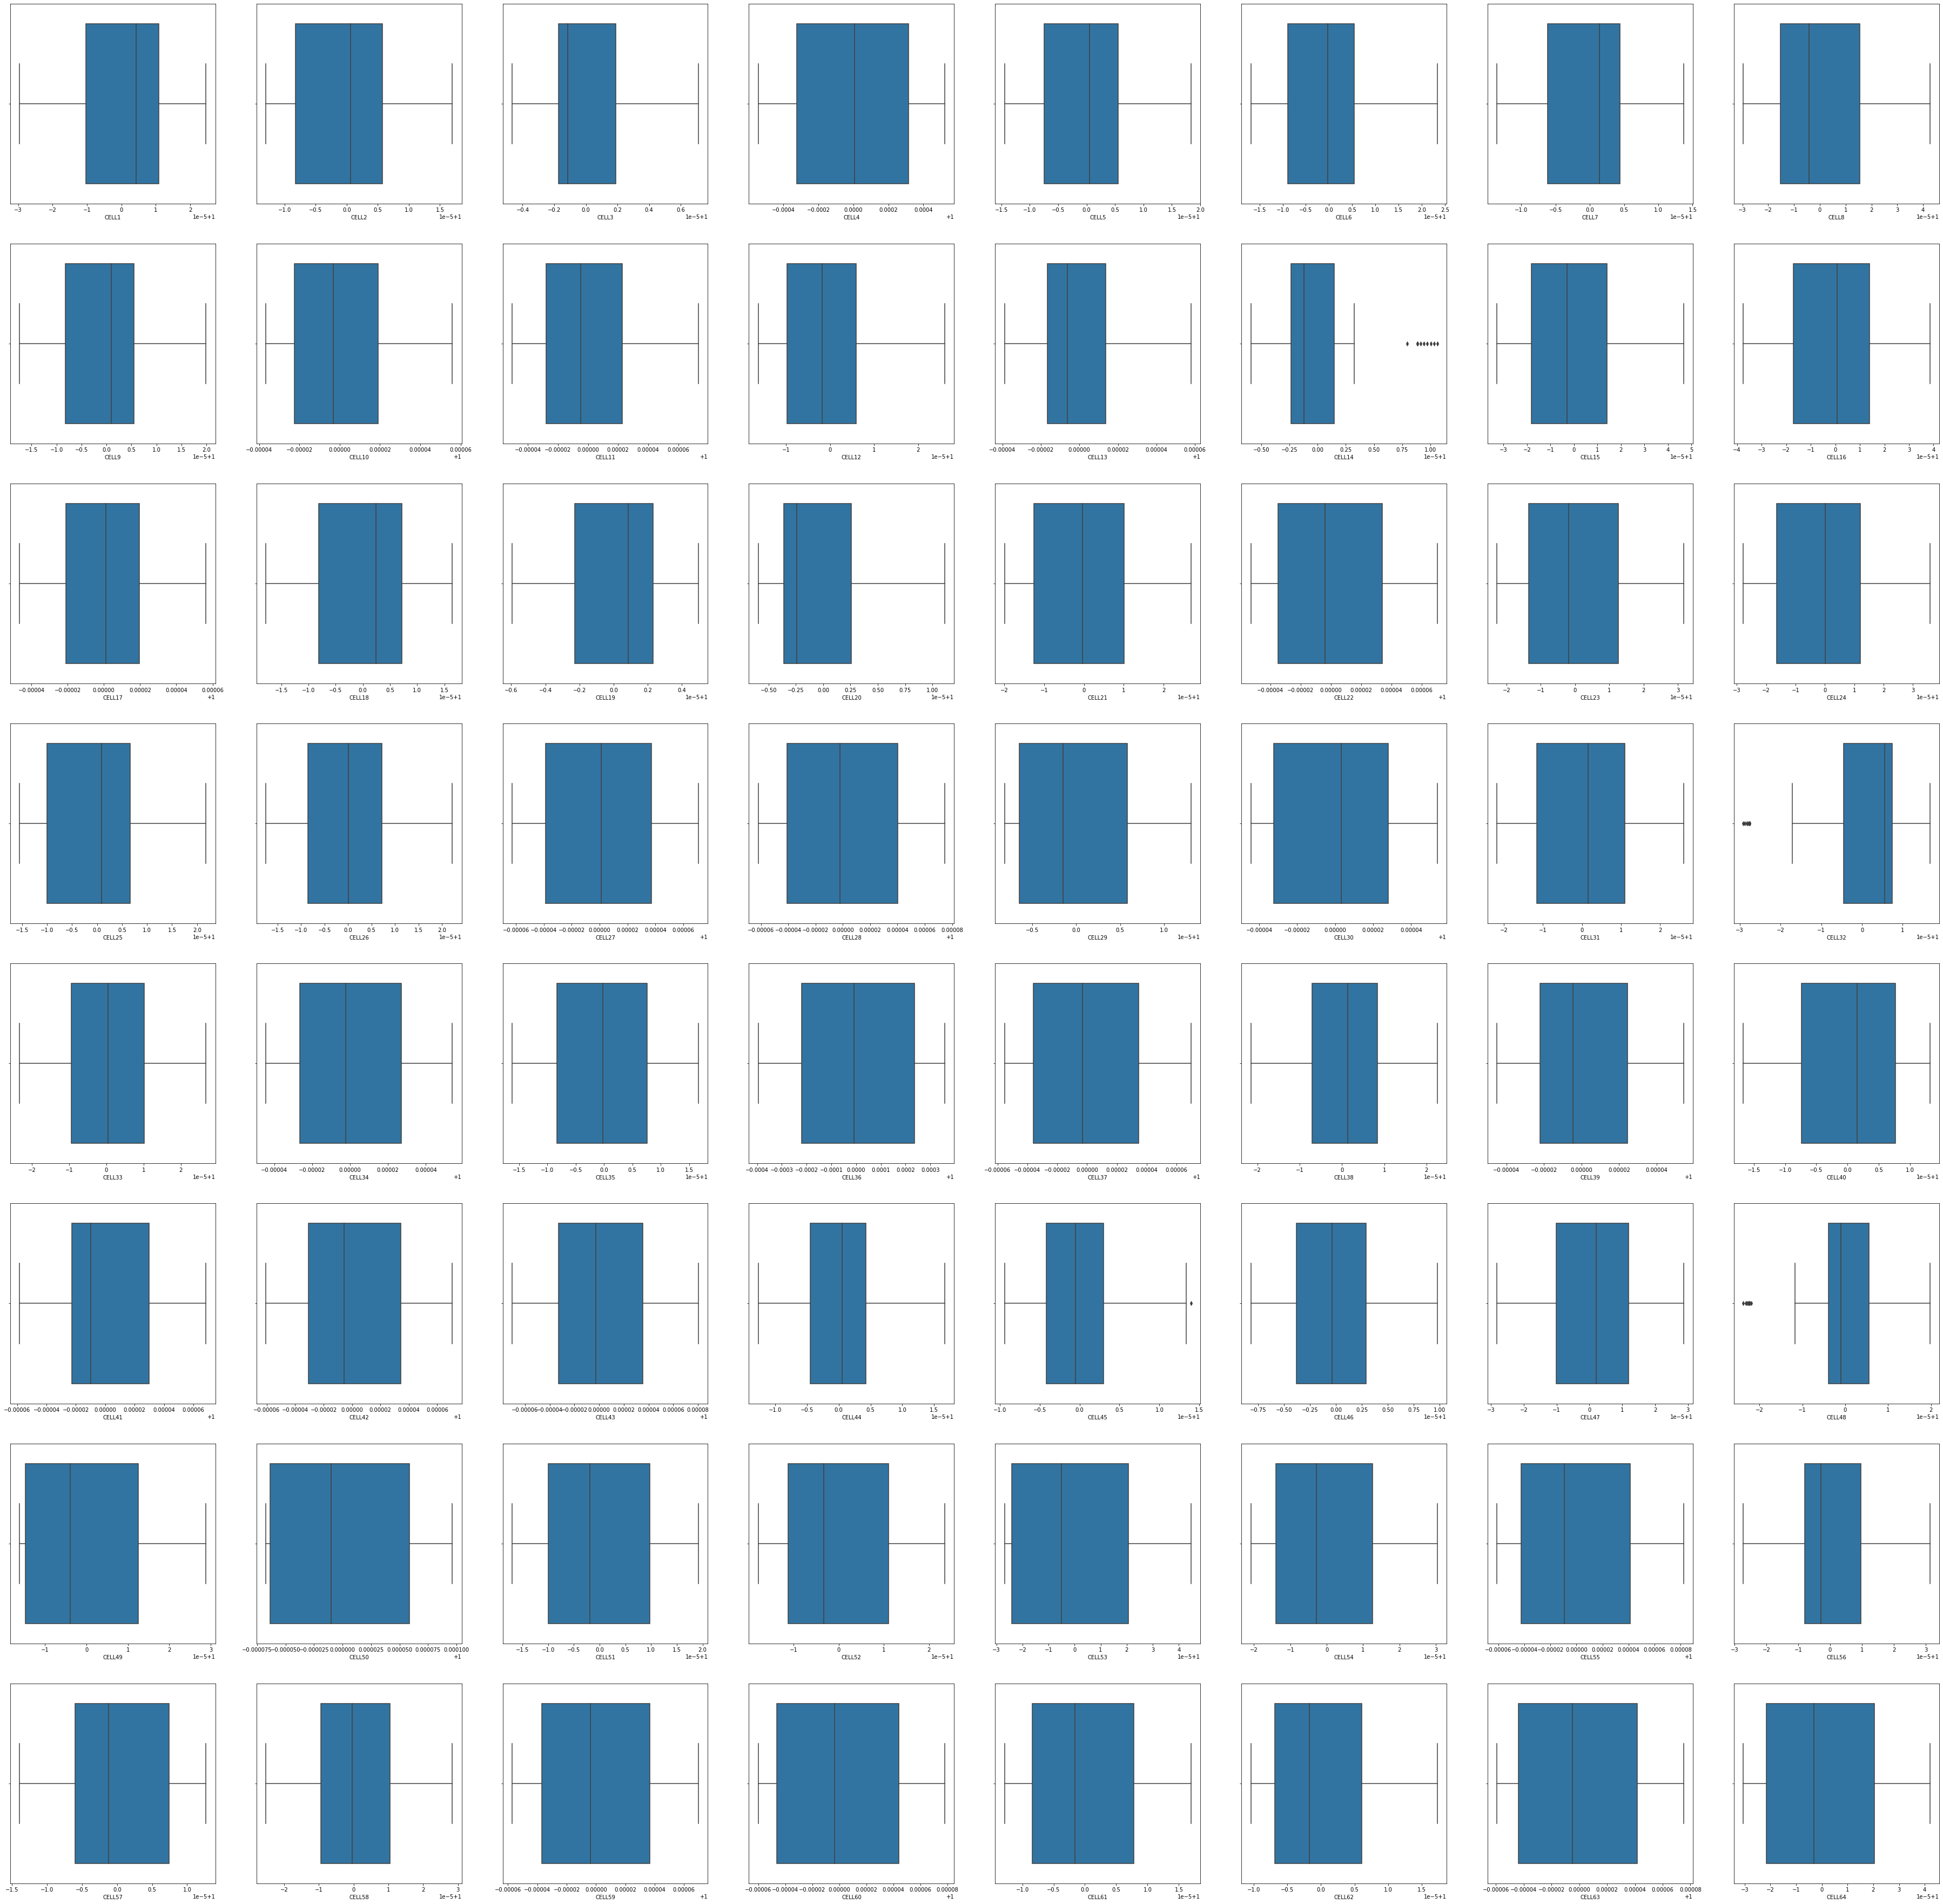

In [70]:
names = list(celldata.columns)

f, axes = plt.subplots(round(len(names)/8), 8, figsize=(64, 64)) 

y = 0;
for name in names:
    i, j = divmod(y, 8)
    sns.boxplot(x=celldata[name], ax=axes[i, j])
    y = y + 1

plt.show()